
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer

I was working as a decision scientist in my previous firm and there was a project for which we faced the "Solve the right problem the wrong way, so no one uses it" challenge. Our team was working with a retail giant and our main stakeholder who was the VP of that particular business division asked us to come up with a goal setting framework for that product sales in each store. After consulting with the client regarding the assumptions like geographies to be considered, stores to be considered etc., we had collected the data and came up with a framework which determines the goals for each store based on its previous performance and also based on the performance of similar stores. 

Once we have finished the project, we created an interactive dashboard in Tableau and delivered the product to the client and created a manual to facilitate the use of this tool by regional managers. We have also deployed the tool on the client's environment. But with in a few weeks , we realized that the tool was not being used by the regional managers as expected. Upon discussing the reasons with some of the regional managers, we came to know that most of them found it difficult to move away from their existing system and adapt to the new tool. We realized although the goal setting framework was good , the interface was not very intuitive for the managers. After a painstaking process of consulting with many regional managers and training them on using the tool ,we were successful in making those changes and increasing the consumption of the tool. Our most important learnings from this incident was that to involve  the end stakeholders in the loop from the start and iterate the design till the solution is robust.



# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


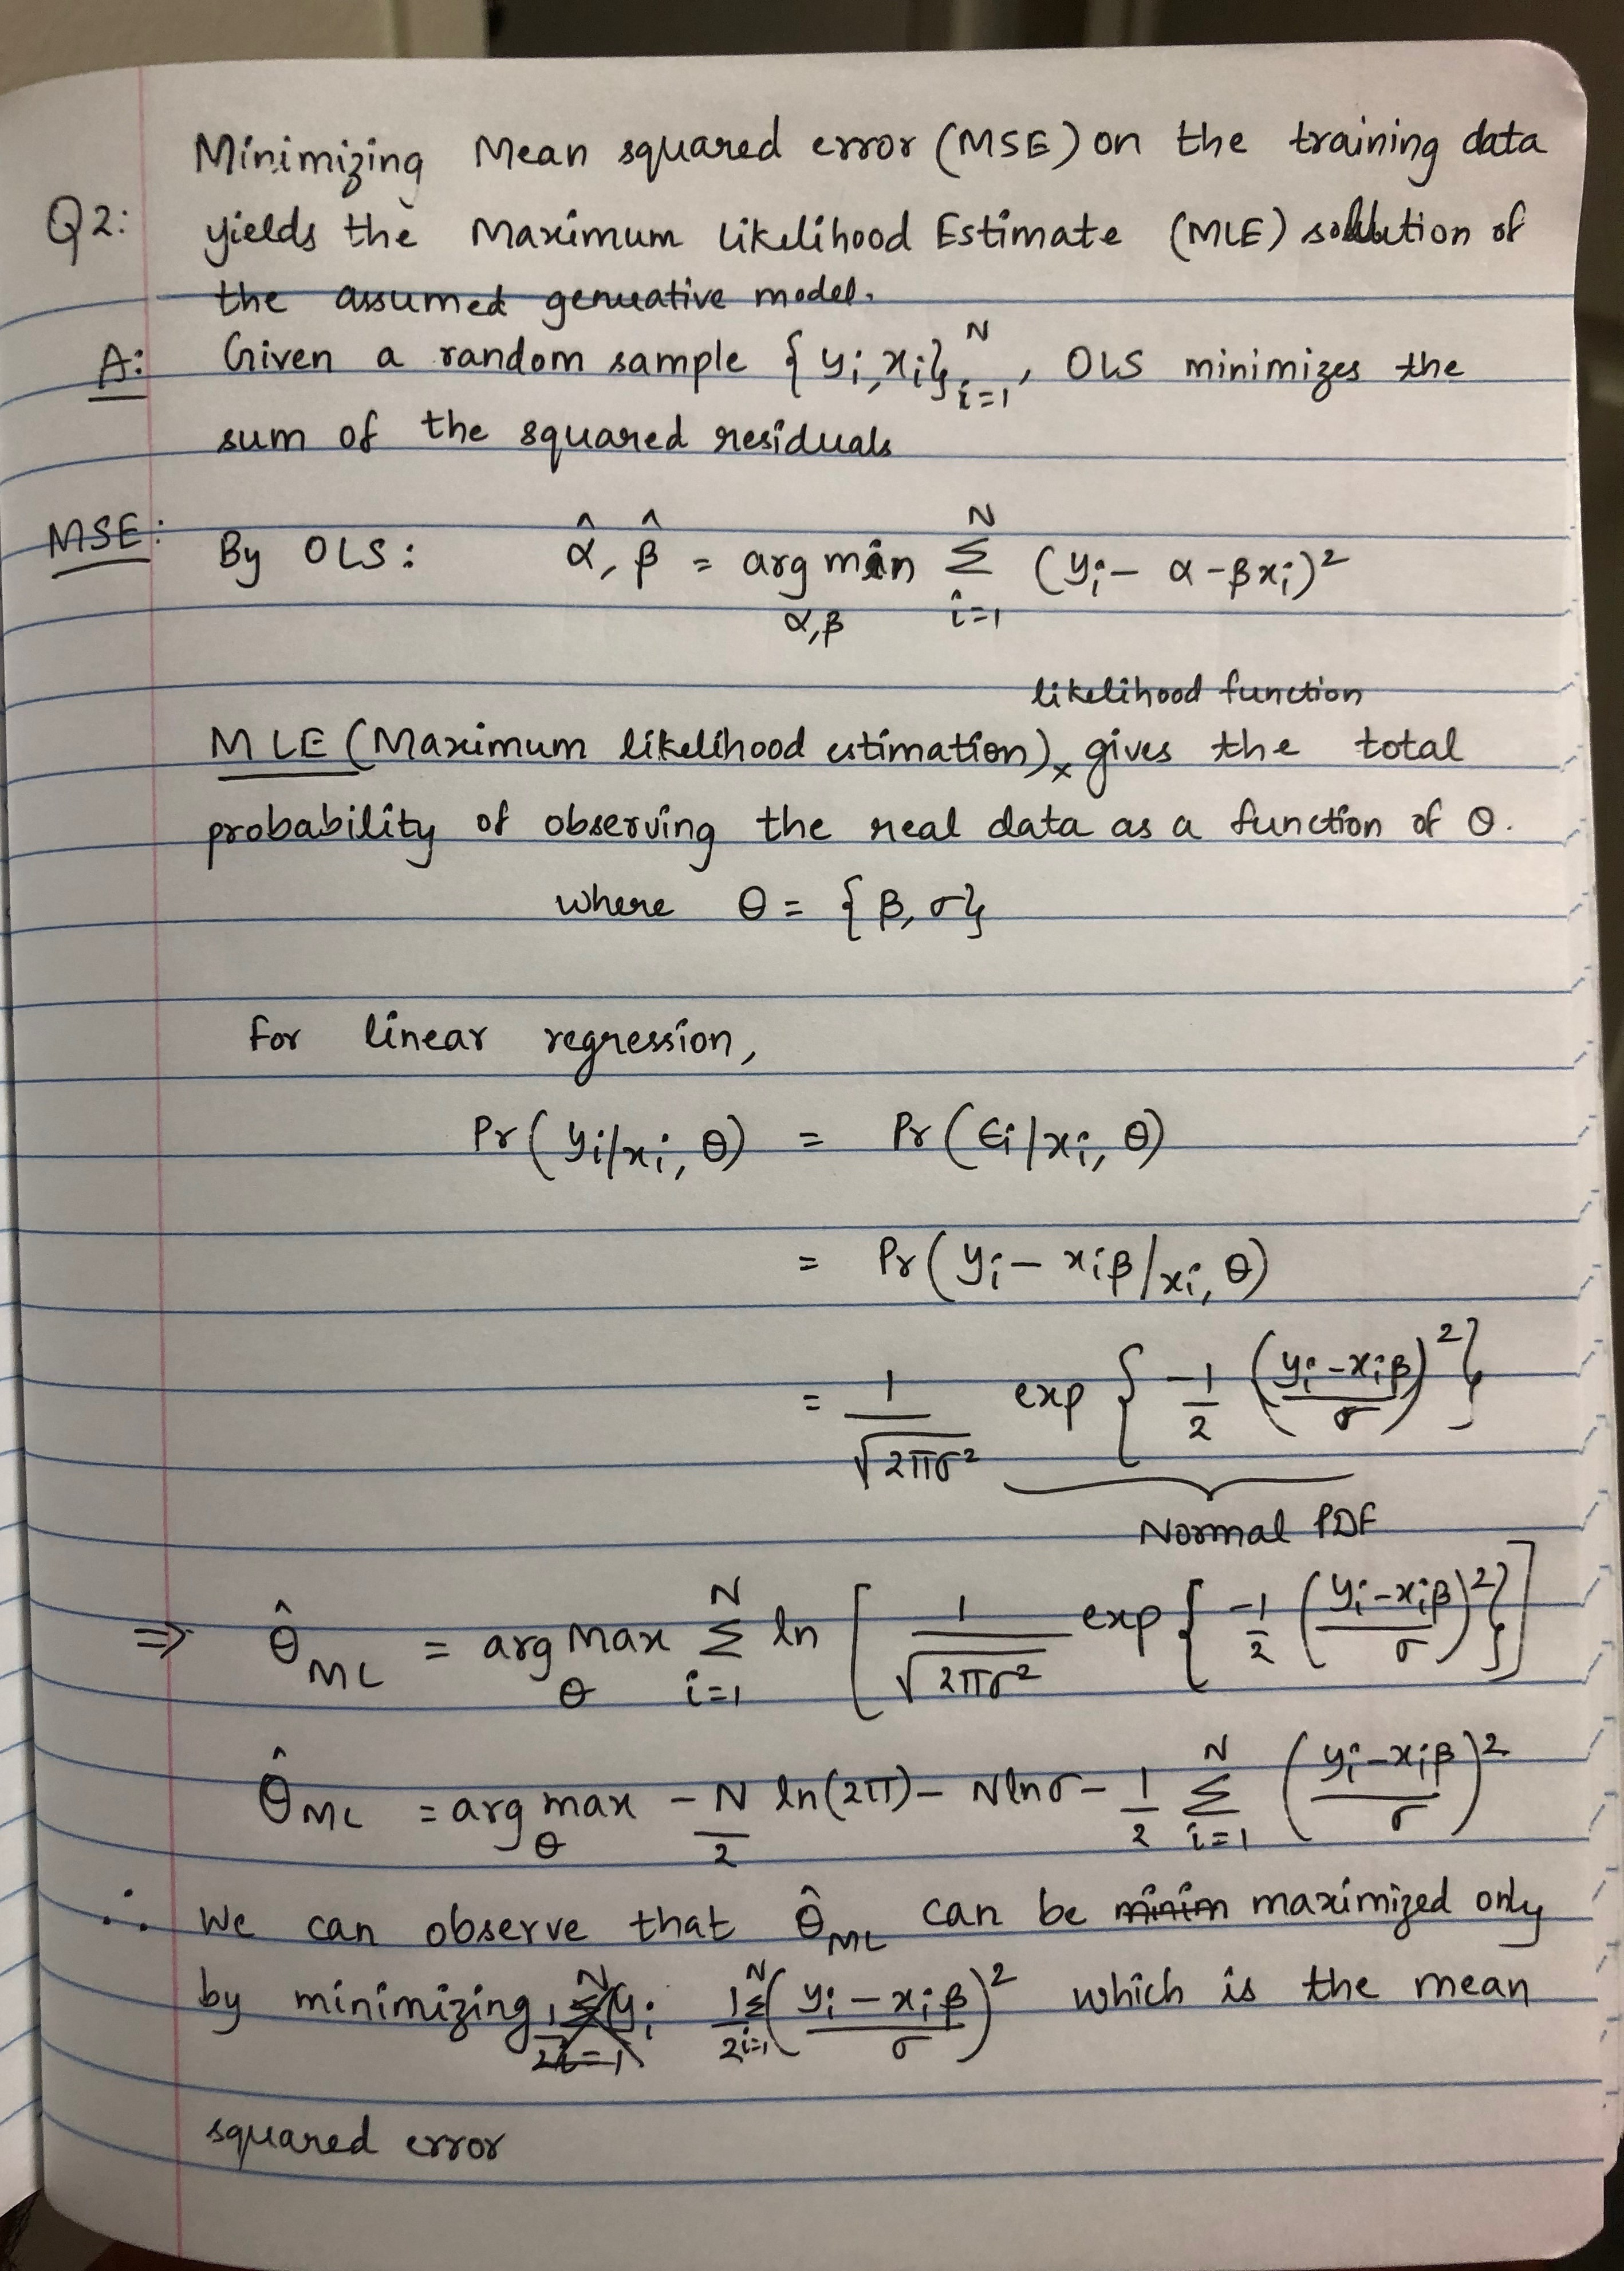

In [32]:
from IPython.display import Image
Image(filename='Q2.jpg')

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.

Feature selection is one of the most important steps while performing any type of modelling. While selecting the features ,we often encounter a situation where two or more than to variables have a relationship between them. For example, sales and units in a retail store are collinear as increase in units will result in an increase in sales proportionally.

The issue with collinearity in MLR is that if we consider collinear variables for the modelling process, we will not be able to rightly comprehend the confidence intervals of the points that we predict at the end of the process. The beta coefficients in the equation can take mulitple values that give the same prediction result, which will not help in accurately intrepreting the effect of any variable.

One best method to follow is to introduce a penalty parameter to minimize the effect of collinearity on the beta coefficients.  
This can be done by 2 methods :  **Lasso and Ridge regression**

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

Populating the interactive namespace from numpy and matplotlib


a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

In [2]:
print ('Shape of feature matrix X : ', X.shape)
print('\n')
print ('First 5 rows of the feature matrix :',X.head(5))

Shape of feature matrix X :  (188318, 14)


First 5 rows of the feature matrix :       cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  


b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [3]:
# Create a correlation matrix

# Ordinary least squares
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,Y)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Make predictions using the in sample set
y_pred = regr.predict(X)

print("Mean absolute error(MAE) : %.2f"
      % mean_absolute_error(Y,y_pred))

Coefficients: 
 [-2137.11121171  1762.2406163    -56.57968487  -301.1729806
    30.03201819  -557.22509919  1707.95520608   298.61240614
  2049.37910438  -250.01986129 -1732.34887444  2724.38985824
  -631.30128902   273.62600504]
Mean absolute error(MAE) : 1950.36


c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

# Make predictions using the in sample set
y_pred_train = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
# Metrics for in sample dataset
print ("Mean absolute error(MAE) for train data: %.2f" % mean_absolute_error(Y_train,y_pred_train))


#Test
# Make predictions using the testing set
y_pred_test = regr.predict(X_test)
# Metrics for test dataset
print("Mean absolute error(MAE) for test data : %.2f" % mean_absolute_error(Y_test,y_pred_test))

Coefficients: 
 [-2112.36598583  1747.61633273   -59.61221609  -309.73361141
    54.0691334   -722.6879248   1799.5234034    322.87100937
  2061.937997    -217.85484002 -1824.71984115  2781.27671404
  -539.83899448   245.42748772]
Mean absolute error(MAE) for train data: 1946.99
Mean absolute error(MAE) for test data : 1954.11


d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

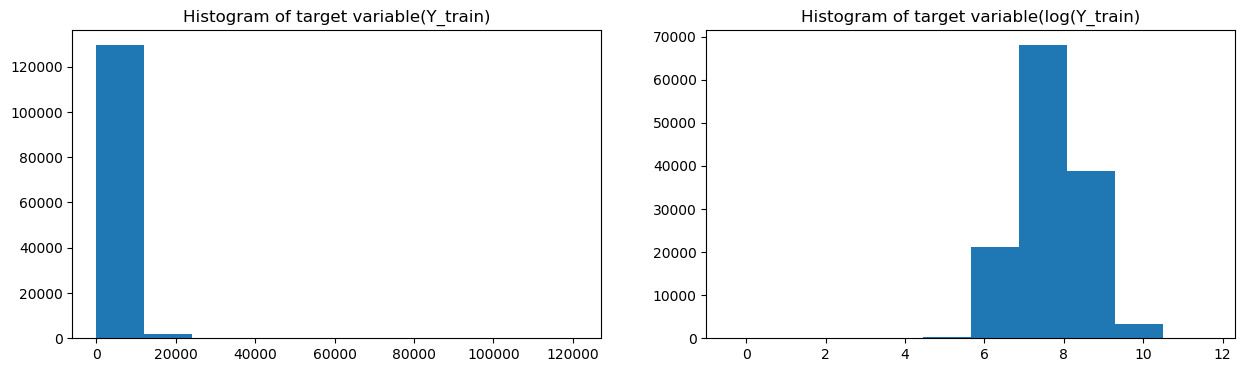

In [5]:
plt.rcdefaults()
fig,((ax1,ax2)) = subplots(nrows=1,
                           ncols=2,
                           sharey=False,
                           figsize=(15, 4))

ax1.hist(Y_train)
ax1.set_title('Histogram of target variable(Y_train)')
ax2.hist(log(Y_train))
ax2.set_title('Histogram of target variable(log(Y_train)')
plt.show()

In [6]:
# Transforming the target variable to log 
Y_train_log = log(Y_train)
Y_test_log = log(Y_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train_log)

# Make predictions using the in sample set
y_pred_train_log = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
# Metrics for in sample dataset
print ("Mean absolute error(MAE) for train data(log): %.2f" % mean_absolute_error(Y_train,np.exp(y_pred_train_log)))


#Test
# Make predictions using the testing set
y_pred_test_log = regr.predict(X_test)
# Metrics for test dataset
print("Mean absolute error(MAE) for test data(log) : %.2f" % mean_absolute_error(Y_test,np.exp(y_pred_test_log)))

Coefficients: 
 [-0.52588761  0.35783024  0.0118692  -0.0804539  -0.00969466 -0.0760021
  0.30995207  0.08806011  0.58115346 -0.16620447 -0.43083212  0.63293664
 -0.09926083  0.09445908]
Mean absolute error(MAE) for train data(log): 1797.44
Mean absolute error(MAE) for test data(log) : 1810.65


**Results:**  
We can observe that y_train became seemingly normally distributed after taking the log transformation. As this follows the primary assumption of linear regression that the y variabe requires to be normally distributed,we can see that there is a decrease in MAE for both train data and test data.

The MAE for both train data and test data reduced by ~150 units after applying log transformation.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)



1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

In [17]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

X_train = X_train.reset_index().drop('index', axis=1)
Y_train = Y_train.reset_index().drop('index', axis=1)

# Transforming the target variable to log 
Y_train_log = log(Y_train)
Y_test_log = log(Y_test)

lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-6,100)*0.5

k_fold = KFold(5)

lasso_MAE = []
for i in range(0,len(alphas)):
    MAE_k = []
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        clf = linear_model.Lasso(alpha=alphas[i])
        clf.fit(X_train.iloc[train], log(Y_train.iloc[train]))
        y_pred_test_log = clf.predict(X_train.iloc[test])
        k = mean_absolute_error(Y_train.iloc[test],np.exp(y_pred_test_log))
        MAE_k.append(k)
    m = mean(MAE_k)
    lasso_MAE.append(m)

l = pd.DataFrame(lasso_MAE)
l['alphas'] = alphas
l.columns = ['lasso_MAE','alphas']
print('Best chosen alpha value on cross validation(Lasso) is :',alphas[l['lasso_MAE'].idxmin()])

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best chosen alpha value on cross validation(Lasso) is : 6.309284415330092e-05


**Ridge regression**

In [21]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

X_train = X_train.reset_index().drop('index', axis=1)
Y_train = Y_train.reset_index().drop('index', axis=1)

# Transforming the target variable to log 
Y_train_log = log(Y_train)
Y_test_log = log(Y_test)

alphas =  10**np.linspace(10,-6,100)*0.5

k_fold = KFold(5)

ridge_MAE = []
for i in range(0,len(alphas)):
    MAE_k = []
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        clf = linear_model.Ridge(alpha=alphas[i])
        clf.fit(X_train.iloc[train], log(Y_train.iloc[train]))
        y_pred_test_log = clf.predict(X_train.iloc[test])
        k = mean_absolute_error(Y_train.iloc[test],np.exp(y_pred_test_log))
        MAE_k.append(k)
    m = mean(MAE_k)
    ridge_MAE.append(m)

r = pd.DataFrame(ridge_MAE)
r['alphas'] = alphas
r.columns = ['ridge_MAE','alphas']
print('Best chosen alpha value on cross validation(Ridge) is :',alphas[r['ridge_MAE'].idxmin()])

Best chosen alpha value on cross validation(Ridge) is : 13.5929412136647


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


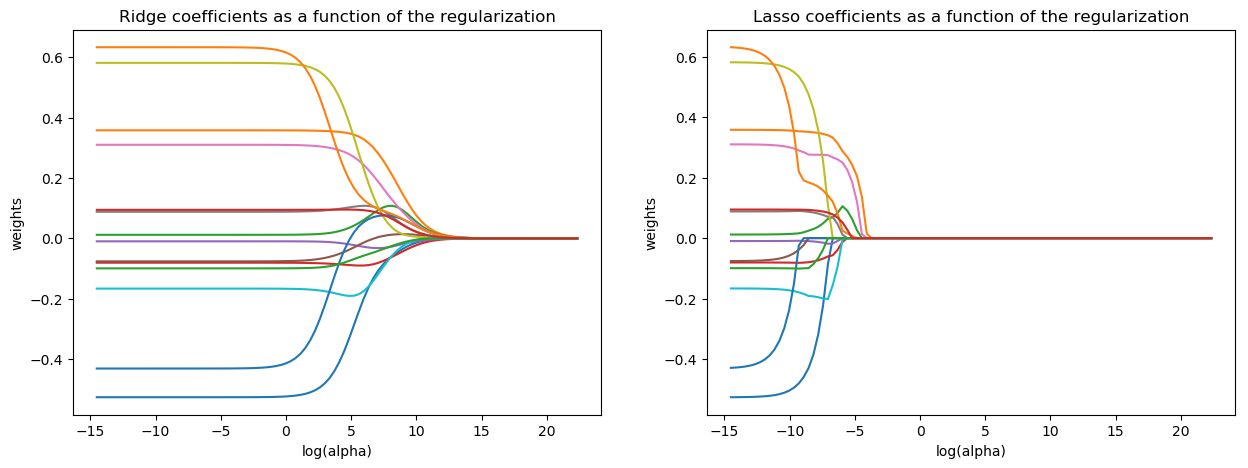

In [22]:
from sklearn.linear_model import Ridge
ridge_coefs = []
log_alphas_r = []
for a in alphas:
    reg_ridge = linear_model.Ridge(alpha=a)
    reg_ridge.fit(X_train, Y_train_log)
    ridge_coefs.append(reg_ridge.coef_.tolist())
    log_alphas_r.append(np.repeat(np.log(a),14))

fig,((ax1,ax2)) = subplots(nrows=1,
                           ncols=2,
                           sharey=False,
                           figsize=(15, 5))
ridge_list = []
for a in ridge_coefs:
    ridge_list.append(a[0])
ax1.plot(log_alphas_r,ridge_list)
ax1.set_xlabel('log(alpha)')
ax1.set_ylabel('weights')
ax1.set_title('Ridge coefficients as a function of the regularization')

# Running Lasso Regression for all the alpha values
lasso_coefs = []
log_alphas_l = []
for a in alphas:
    reg_lasso = linear_model.Lasso(alpha = a)
    reg_lasso.fit(X_train,Y_train_log)
    lasso_coefs.append(reg_lasso.coef_.tolist())
    log_alphas_l.append(np.repeat(np.log(a),14))

lasso_list = []
ax2.plot(log_alphas_l,lasso_coefs)
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

**Observation:**
The coefficients of various features in ridge regression decrease slowly towards zero where as the coefficients in Lasso regression become zero very quickly. In other words, the penalty that is imposed in Lasso regression allows very few coefficients that have considerable influence and puts everything else to zero.


3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)


**Least squares regression**

In [23]:
# Transforming the target variable to log 
Y_train_log = log(Y_train)
Y_test_log = log(Y_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train_log)

#Test
# Make predictions using the testing set
y_pred_test_log = regr.predict(X_test)
# Metrics for test dataset
print("Mean absolute error(MAE) for test data(log) - Least Squares Regression : %.2f" % mean_absolute_error(Y_test,np.exp(y_pred_test_log)))

Mean absolute error(MAE) for test data(log) - Least Squares Regression : 1810.65


**Ridge Regression**


In [24]:
# Train the model using the training sets
ridge = linear_model.Ridge(alpha= alphas[r['ridge_MAE'].idxmin()])
ridge.fit(X_train, Y_train)
ridge.fit(X_train,Y_train_log)

#Test
# Make predictions using the testing set
y_pred_test_log_r = ridge.predict(X_test)

# Metrics for test dataset
print("Mean absolute error(MAE) for test data(log) - Ridge Regression : %.2f" % mean_absolute_error(Y_test,np.exp(y_pred_test_log_r)))

Mean absolute error(MAE) for test data(log) - Ridge Regression : 1810.63


**Lasso Regression**

In [28]:
# Train the model using the training sets
lasso = linear_model.Lasso(alpha= alphas[l['lasso_MAE'].idxmin()])
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train_log)

#Test
# Make predictions using the testing set
y_pred_test_log_l = lasso.predict(X_test)

# Metrics for test dataset
print("Mean absolute error(MAE) for test data(log) - Lasso Regression : %.2f" % mean_absolute_error(Y_test,np.exp(y_pred_test_log_l)))

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Mean absolute error(MAE) for test data(log) - Lasso Regression : 1810.64


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [36]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, Y_train_log)

mse = []
for i in range(len(lasso_cv.mse_path_)):
    avg_mse = lasso_cv.mse_path_[i].mean()
    mse.append(avg_mse)

# Calculating the min lambda from lasso cv
min_lambda_lcv = lasso_cv.alphas_[mse.index(min(mse))]
print('Best lambda based on cross validation(Lasso):',min_lambda_lcv)

# Run the lasso regression on the minimum lambda
reg_lasso = linear_model.Lasso(alpha = min_lambda_lcv)
reg_lasso.fit(X_train,Y_train_log)

# Calculate the coefficients for all the variables
reg_lasso.coef_


Best lambda based on cross validation(Lasso): 1.742378003185893e-05


array([-0.51711206,  0.35693216,  0.01261526, -0.08068485, -0.00950437,
       -0.06881325,  0.30609698,  0.08840324,  0.57216477, -0.16869083,
       -0.35348216,  0.55420528, -0.09951851,  0.09436384])

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.


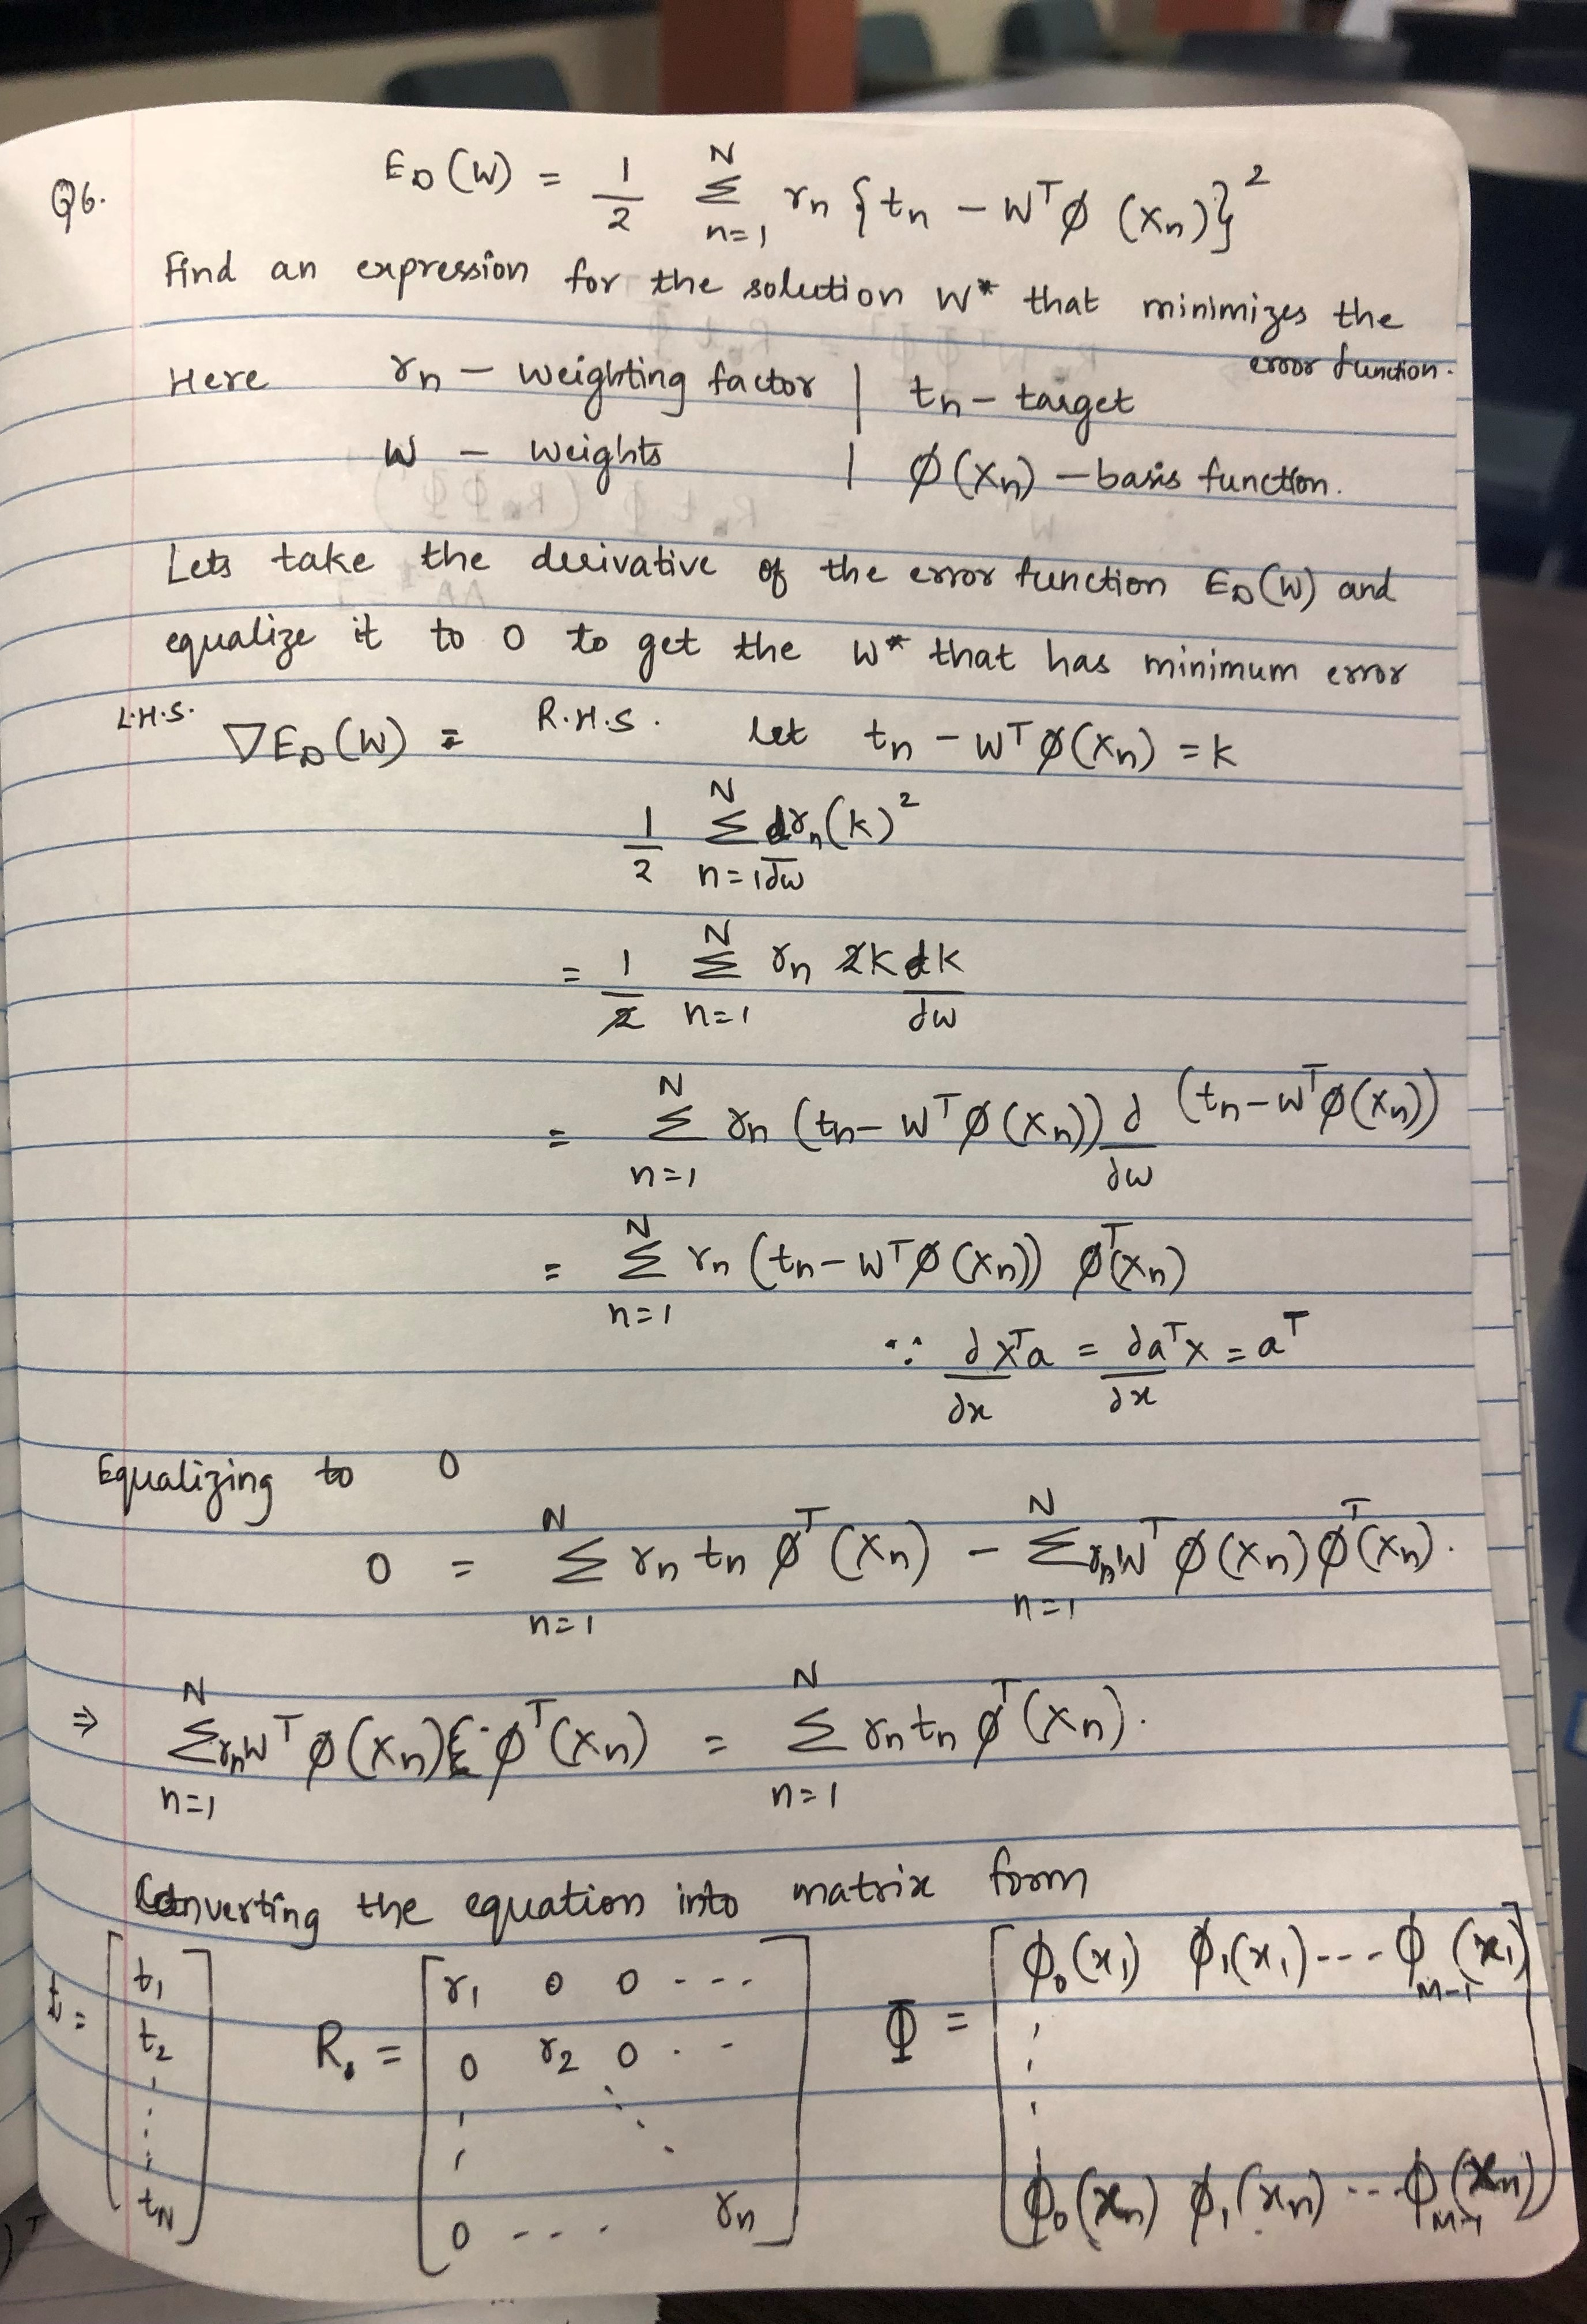

In [33]:
from IPython.display import Image
Image(filename='Q6a.jpg')

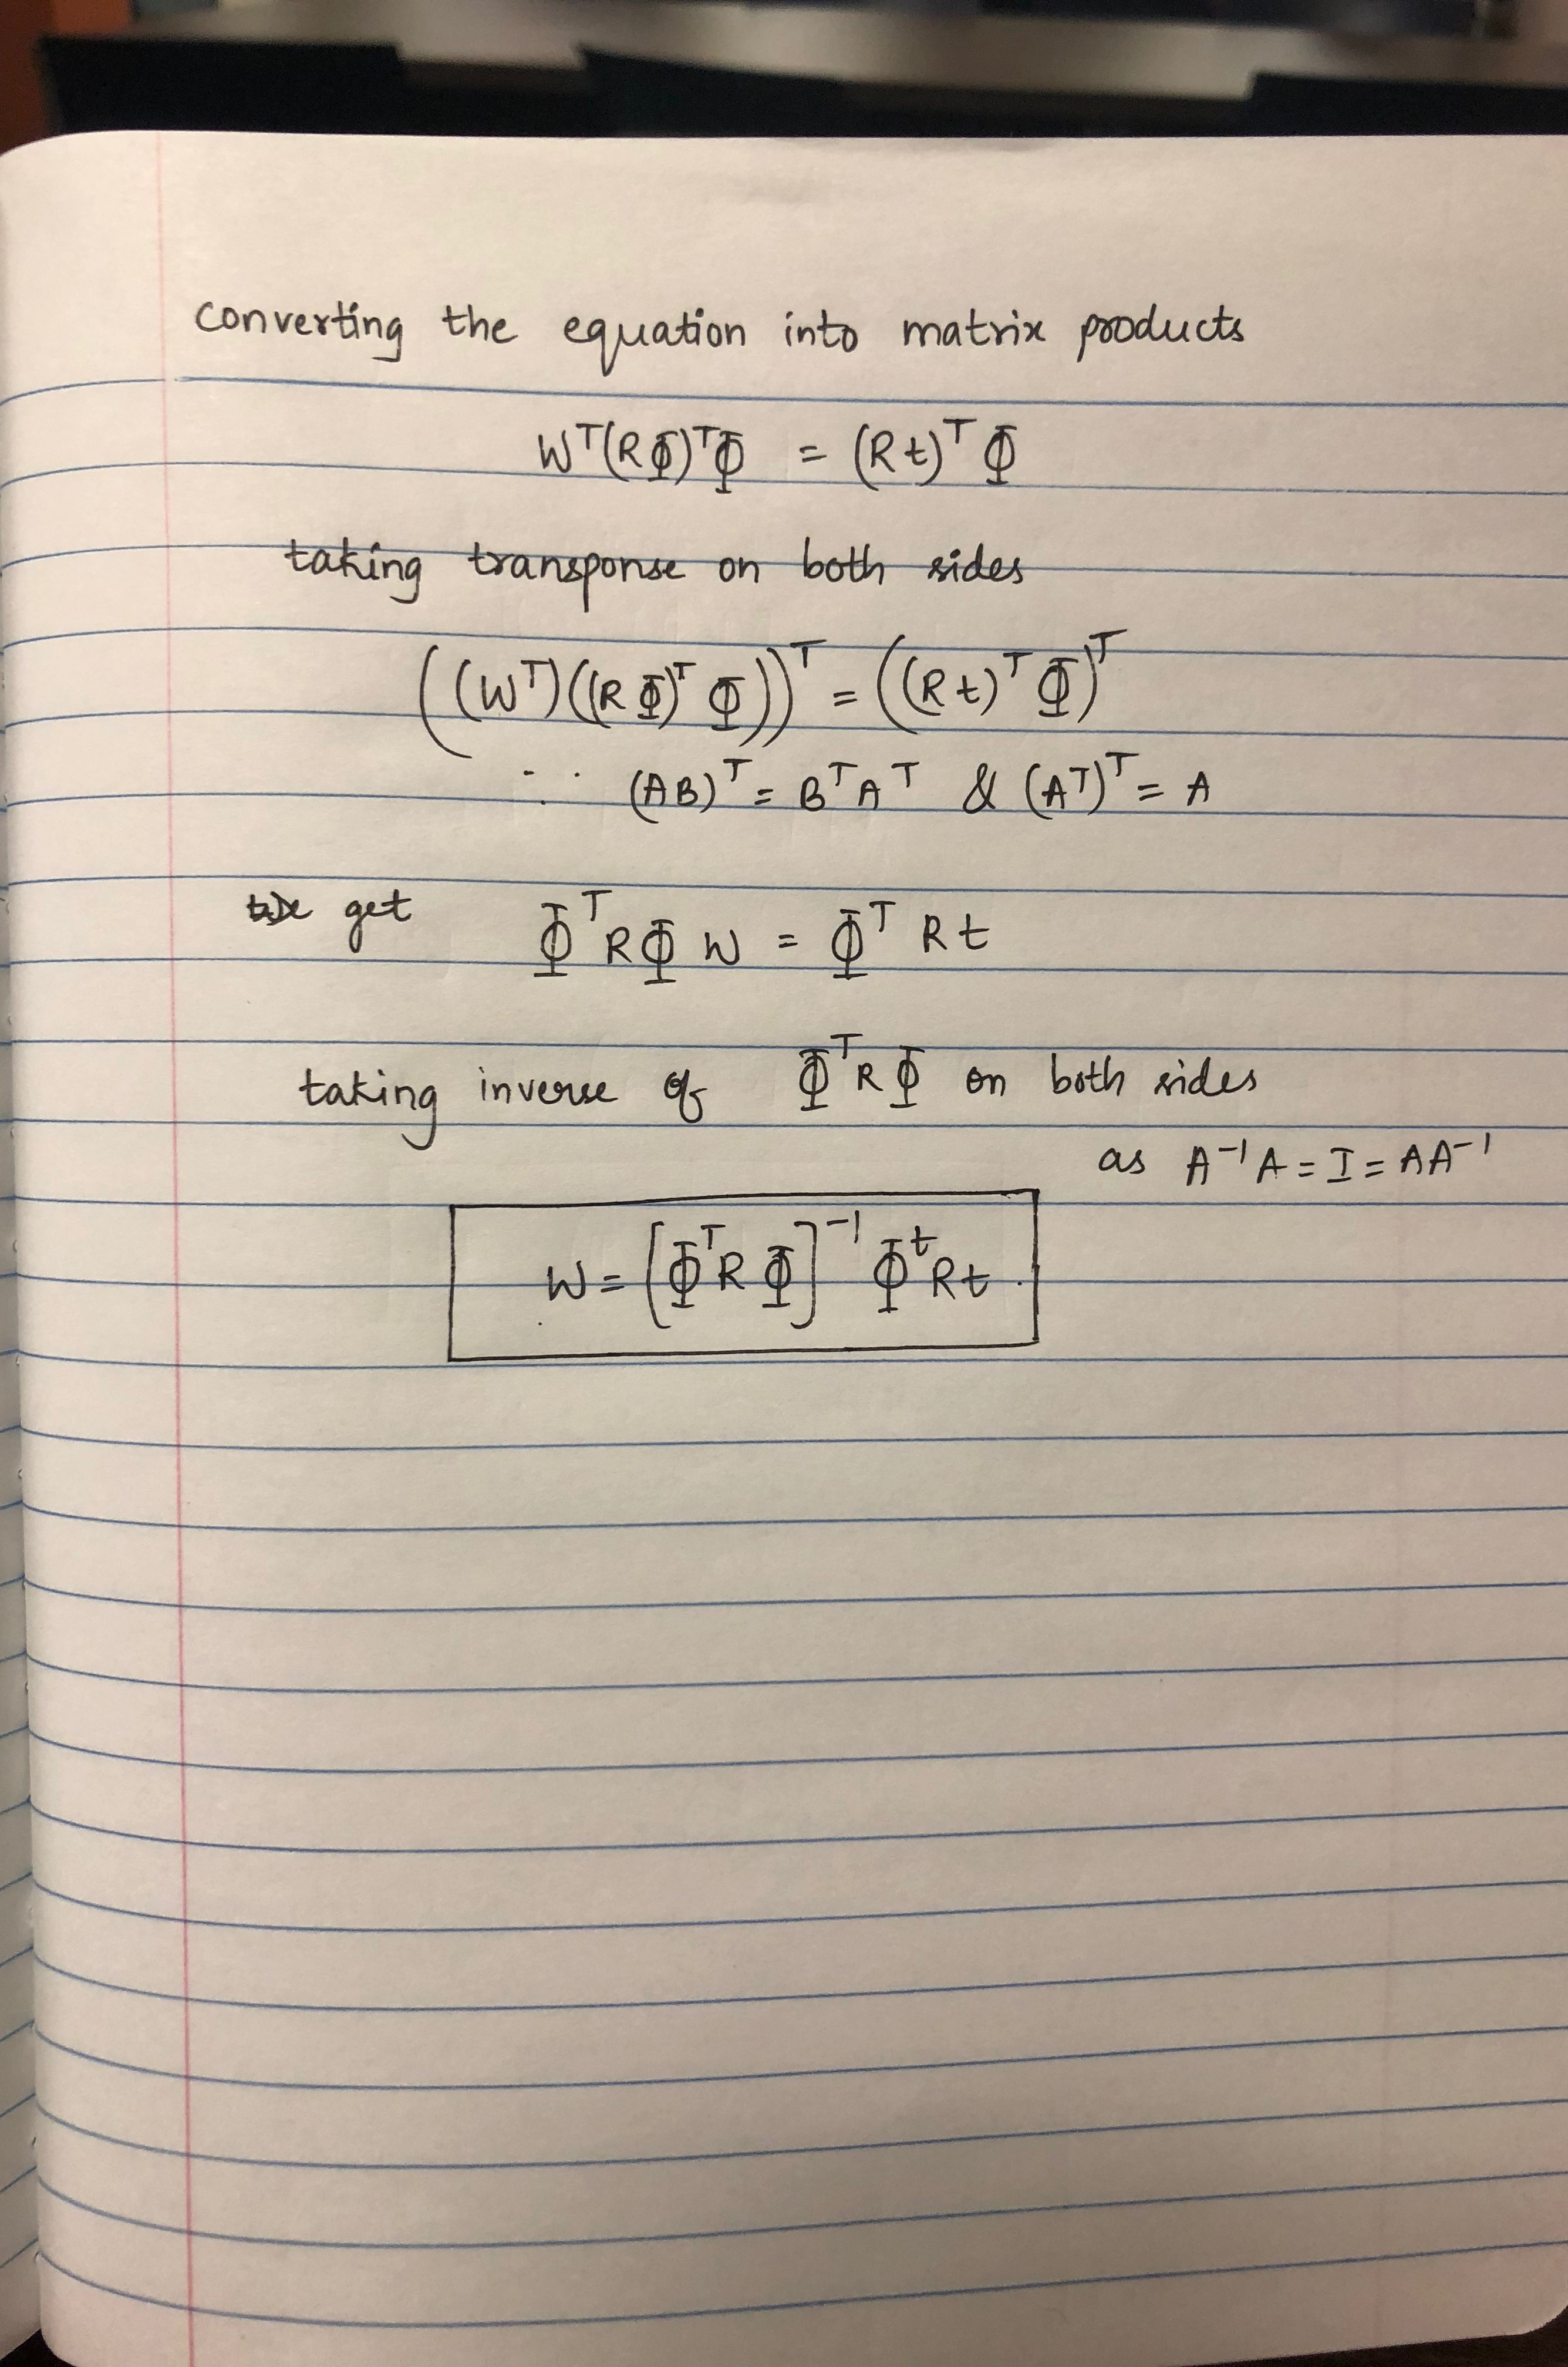

In [34]:
from IPython.display import Image
Image(filename='Q6b.jpg')

**Data dependent noise variance:**  
One of the assumptions in least squares regression is that the standard deviation of the error term is constant over all values of the predictor or explanatory variables. But when the noise variance is data dependent, inference from the estimates would not be accurate as the parameter estimates are skewed by data points at some particular space. By using weights with least squares regression, we can assign weights inversely proportional to the variance at each level of the explanatory variables that will yield the optimum parameter estimates.  

**Replicated data points:**  
The weights that are used for the weighted least squares regression have to be estimated prior to using them in the equation. But if these weights are estimated from small number of replicated observations, the results of an analysis can be unpredictably affected. This is especially likely to be the case when the weights for extreme values of the predictor or explanatory variables are estimated using only a few observations.